

# FNN Zalando


In [2]:
import numpy
# scipy.special für die Sigmoid-Funktion expit()
import scipy.special
# Bibliothek zum Plotten von Arrays
import matplotlib.pyplot
# sicherstellen, dass die Plots in diesem Notebook und nicht in einem externen Fenster angezeigt werden
%matplotlib inline

In [3]:
# Definition der neuronalen Netzwerkklasse
class neuralNetwork:
    
    # Initialisierung des neuronalen Netzwerks
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # Anzahl der Nodes in jeder Input-, hidden und output layer festlegen
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # Gewichtsmatrizen, wih und who
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # Lernrate
        self.lr = learningrate
        
        # Aktivierungsfunktion ist die Sigmoid-Funktion
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    # Trainieren des neuronalen Netzwerks
    def train(self, inputs_list, targets_list):
        # Inputs in ein 2D-Array umwandeln
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # Signale in dem Hidden Layer berechnen
        hidden_inputs = numpy.dot(self.wih, inputs)
        # Signale berechnen, die aus dem Hidden Layer hervorgehen
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # Signale in dem endgültigen Output Layer berechnen
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # Signale berechnen, die aus dem endgültigen Output Layer  hervorgehen
        final_outputs = self.activation_function(final_inputs)
        
        # Fehler in dem Output Layer ist (Ziel - Ist)
        output_errors = targets - final_outputs
        # Fehler in dem Hidden Layer ist der output_errors, aufgeteilt nach Gewichten, neu kombiniert an den Hidden Nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # Gewichte für die Verbindungen zwischen den hidden und den Output Layers aktualisieren
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # Gewichte für die Verbindungen zwischen den Input- und den Hidden Layern aktualisieren
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    # Abfragen des neuronalen Netzwerks
    def query(self, inputs_list):
        # Input List in ein 2D-Array umwandeln
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # Signale in die Hidden Layern berechnen
        hidden_inputs = numpy.dot(self.wih, inputs)
        # Signale berechnen, die aus dem Hidden Layer hervorgehen
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # Signale in den endgültigen Output Layer berechnen
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # Signale berechnen, die aus dem endgültigen Output Layer hervorgehen
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [4]:
# Anzahl an input, hidden und output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 1

# Lernrate
learning_rate = 0.05

# Erstelle Instanz des neuronalen Netzwerks
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [5]:
with open("../data/fashion-mnist_train.csv", 'r') as training_data_file:
    training_data_list = training_data_file.readlines()[1:]

In [6]:
# Epochen ist die Anzahl der Male, die der Trainingsdatensatz zum Training verwendet wird
epochs = 1

# Zähler für übersprungene Datensätze
skipped_records = 0

for e in range(epochs):
    # Gehe durch alle Datensätze im Trainingsdatensatz
    for record in training_data_list:
        # Teile den Datensatz durch die ',' Kommas
        all_values = record.split(',')
        # Überprüfe, ob alle Werte vorhanden sind
        if len(all_values) < 2 or '' in all_values:
            skipped_records += 1
            continue
        # Skaliere und verschiebe die Eingaben
        inputs = (numpy.asarray(all_values[1:], dtype=float) / 255.0 * 0.99) + 0.01
        # Erstelle den Zielausgabewert (0.01 oder 0.99)
        target = numpy.array([0.99 if int(all_values[0]) == 1 else 0.01])


In [7]:
print(f'Skipped records: {skipped_records}/{len(training_data_list)}')

Skipped records: 0/60000


In [8]:
with open("../data/fashion-mnist_test.csv", 'r') as test_data_file:
    test_data_list = test_data_file.readlines()[1:]

In [9]:
# Testen des neuronalen Netzwerks

# Scorecard für die Leistung des Netzwerks, anfangs leer
scorecard = []

# Zähler für übersprungene Datensätze
skipped_records = 0

# Gehe durch alle Datensätze im Testdatensatz
for record in test_data_list:
    # Teile den Datensatz durch die ',' Kommas
    all_values = record.split(',')
    # Überprüfe, ob alle Werte vorhanden sind
    if len(all_values) != 785:  # 1 Label + 784 Merkmale
        skipped_records += 1
        continue
    # Korrekte Antwort ist der erste Wert
    correct_label = int(all_values[0])
    # Skaliere und verschiebe die Eingaben
    inputs = (numpy.asarray(all_values[1:], dtype=float) / 255.0 * 0.99) + 0.01
    # Abfrage des Netzwerks
    outputs = n.query(inputs)
    # Der Output ist ein einzelner Wert, daher vergleichen wir ihn direkt
    predicted_label = 1 if outputs[0] > 0.5 else 0
    # Füge korrekt oder inkorrekt zur Liste hinzu
    if predicted_label == correct_label:
        # Antwort des Netzwerks stimmt mit der korrekten Antwort überein, füge 1 zur Scorecard hinzu
        scorecard.append(1)
    else:
        # Antwort des Netzwerks stimmt nicht mit der korrekten Antwort überein, füge 0 zur Scorecard hinzu
        scorecard.append(0)

In [10]:
# Berechnen Sie die Leistung, die das Verhältnis der richtigen Antworten ist
performance = sum(scorecard) / len(scorecard)
print(f'Performance: {performance}')
print(f'Skipped records: {skipped_records}/{len(test_data_list)}')

Performance: 0.1
Skipped records: 0/10000


In [11]:
# Erstellen Sie eine Liste von 10 Modellen
models = []
for i in range(10):
    models.append(neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate))

In [12]:
# Epochen ist die Anzahl der Male, die der Trainingsdatensatz zum Training verwendet wird
epochs = 1

# Zähler für übersprungene Datensätze
skipped_records = 0

# Trainieren Sie jedes Modell auf die jeweilige Klasse gegen den Rest
for i in range(10):
    for e in range(epochs):
        for record in training_data_list:
            all_values = record.split(',')
            if len(all_values) < 2 or '' in all_values:
                skipped_records += 1
                continue
            inputs = (numpy.asarray(all_values[1:], dtype=float) / 255.0 * 0.99) + 0.01
            target = numpy.array([0.99 if int(all_values[0]) == i else 0.01])
            models[i].train(inputs, target)

In [13]:
# Testen Sie jedes Bild mit allen 10 Modellen
scorecard = []
for record in test_data_list:
    all_values = record.split(',')
    if len(all_values) != 785:
        skipped_records += 1
        continue
    correct_label = int(all_values[0])
    inputs = (numpy.asarray(all_values[1:], dtype=float) / 255.0 * 0.99) + 0.01
    outputs = [model.query(inputs) for model in models]
    predicted_labels = [i for i, output in enumerate(outputs) if output[0] > 0.5]
    if correct_label in predicted_labels:
        scorecard.append(1)
    else:
        scorecard.append(0)

In [14]:
# Berechnen Sie die Leistung
performance = sum(scorecard) / len(scorecard)
print(f'Performance: {performance}')
print(f'Skipped records: {skipped_records}/{len(test_data_list)}')

Performance: 0.8046
Skipped records: 0/10000


In [15]:
# Erstellen Sie eine Liste von 10 Ensembles, die jeweils 10 Modelle enthalten
ensembles = []
for _ in range(10):
    ensemble = []
    for i in range(10):
        ensemble.append(neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate))
    ensembles.append(ensemble)

In [16]:
# Trainiere jedes Modell in jedem Ensemble auf die jeweilige Klasse gegen den Rest
for ensemble in ensembles:
    for i in range(10):
        for e in range(epochs):
            for record in training_data_list:
                all_values = record.split(',')
                if len(all_values) < 2 or '' in all_values:
                    skipped_records += 1
                    continue
                inputs = (numpy.asarray(all_values[1:], dtype=float) / 255.0 * 0.99) + 0.01
                target = numpy.array([0.99 if int(all_values[0]) == i else 0.01])
                ensemble[i].train(inputs, target)

In [17]:
# Testen Sie jedes Bild mit allen Modellen in allen Ensembles
scorecard = []
for record in test_data_list:
    all_values = record.split(',')
    if len(all_values) != 785:
        skipped_records += 1
        continue
    correct_label = int(all_values[0])
    inputs = (numpy.asarray(all_values[1:], dtype=float) / 255.0 * 0.99) + 0.01
    ensemble_outputs = []
    for ensemble in ensembles:
        outputs = [model.query(inputs) for model in ensemble]
        predicted_labels = [i for i, output in enumerate(outputs) if output[0] > 0.5]
        ensemble_outputs.append(predicted_labels)
    # Aggregieren Sie die Vorhersagen aller Ensembles
    all_predictions = sum(ensemble_outputs, [])
    if all_predictions:
        final_prediction = max(set(all_predictions), key=all_predictions.count)
        if correct_label == final_prediction:
            scorecard.append(1)
        else:
            scorecard.append(0)
    else:
        # Behandeln Sie den Fall, in dem kein Modell ein Label mit einer Konfidenz > 0.5 vorhersagt
        scorecard.append(0)

In [19]:
# Berechne die Leistung
performance = sum(scorecard) / len(scorecard)
print(f'Performance: {performance}')
print(f'Skipped records: {skipped_records}/{len(test_data_list)}')






Performance: 0.7977
Skipped records: 0/10000


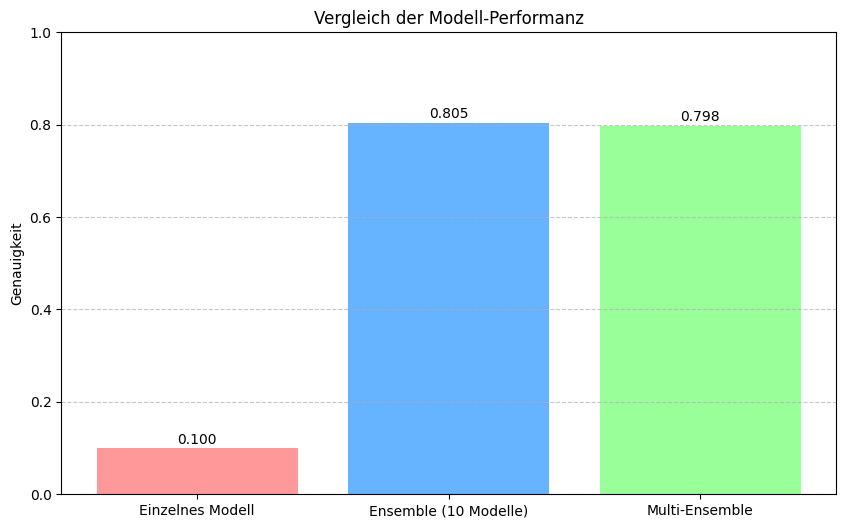

In [20]:
import matplotlib.pyplot as plt

# Daten aus den vorherigen Zellen verwenden
models = ['Einzelnes Modell', 'Ensemble (10 Modelle)', 'Multi-Ensemble']
performance_values = [0.1, 0.8046, 0.7977]  # Diese Werte werden aus den vorherigen Variablen 'performance' genommen

# Diagramm erstellen
plt.figure(figsize=(10, 6))
plt.bar(models, performance_values, color=['#ff9999', '#66b3ff', '#99ff99'])

# Diagramm formatieren
plt.title('Vergleich der Modell-Performanz')
plt.ylabel('Genauigkeit')
plt.ylim(0, 1.0)

# Werte über den Balken anzeigen
for i, v in enumerate(performance_values):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')

# Gitter hinzufügen
plt.grid(axis='y', linestyle='--', alpha=0.7)
